# Transform files using a serverless SQL pool
Data analysts often use SQL to query data for analysis and reporting. Data engineers can also make use of SQL to manipulate and transform data; often as part of a data ingestion pipeline or extract, transform, and load (ETL) process.

In this exercise, you’ll use a serverless SQL pool in Azure Synapse Analytics to transform data in files.

## Before you start
You’ll need an Azure subscription in which you have administrative-level access.


# Provision an Azure Synapse Analytics workspace
You’ll need an Azure Synapse Analytics workspace with access to data lake storage. You can use the built-in serverless SQL pool to query files in the data lake.

In this exercise, you’ll use a combination of a PowerShell script and an ARM template to provision an Azure Synapse Analytics workspace.

1. Sign into the Azure portal at https://portal.azure.com.
2. Use the [>_] button to the right of the search bar at the top of the page to create a new Cloud Shell in the Azure portal, selecting a PowerShell environment and creating storage if prompted. The cloud shell provides a command line interface in a pane at the bottom of the Azure portal, as shown here:

<div class="alert alert-block alert-info">
Note: If you have previously created a cloud shell that uses a Bash environment, use the the drop-down menu at the top left of the cloud shell pane to change it to PowerShell.</div>

3. Note that you can resize the cloud shell by dragging the separator bar at the top of the pane, or by using the —, ◻, and X icons at the top right of the pane to minimize, maximize, and close the pane. For more information about using the Azure Cloud Shell, see the Azure Cloud Shell documentation.

4. In the PowerShell pane, enter the following commands to clone this repo:
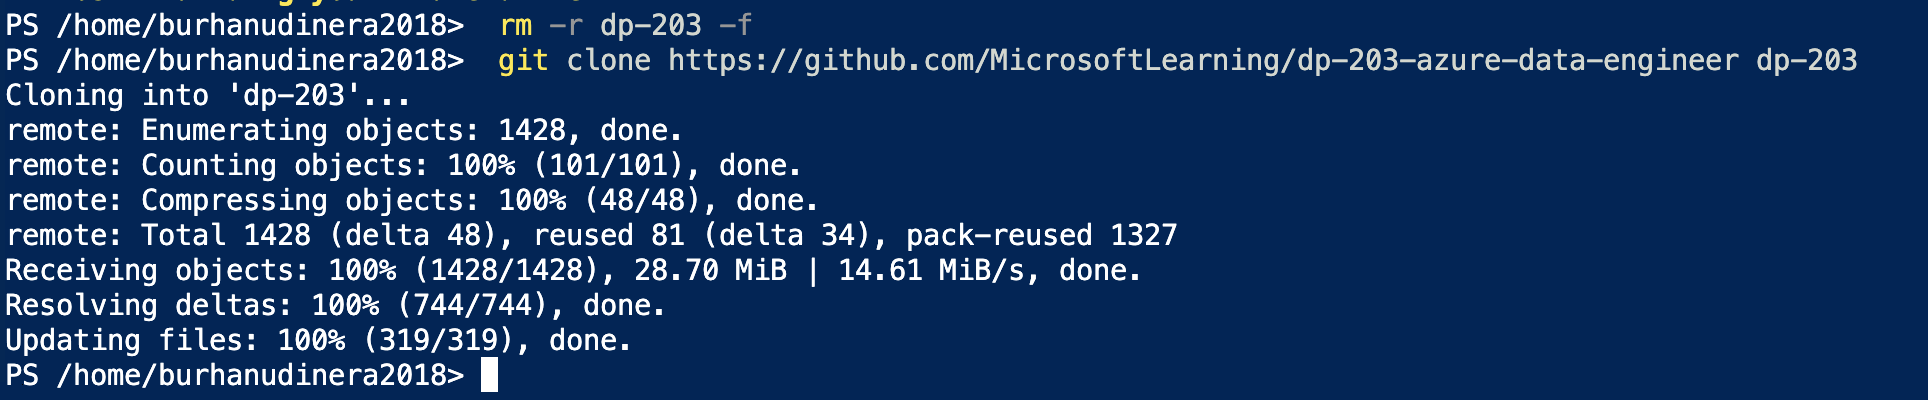
5. After the repo has been cloned, enter the following commands to change to the folder for this exercise and run the setup.ps1 script it contains:
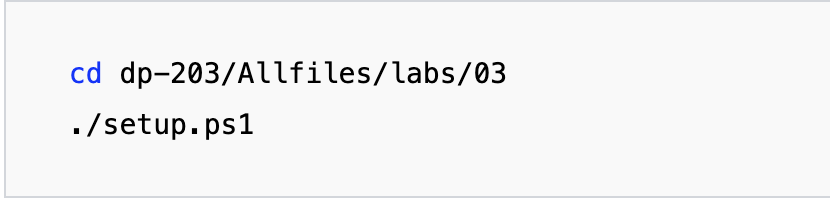
6. If prompted, choose which subscription you want to use (this will only happen if you have access to multiple Azure subscriptions).
7. When prompted, enter a suitable password to be set for your Azure Synapse SQL pool.

<div class="alert alert-block alert-info">
Note: Be sure to remember this password! 'S3cr3t@4zur3'</div>

8. Wait for the script to complete - this typically takes around 10 minutes, but in some cases may take longer. While you are waiting, review the [CETAS with Synapse SQL](https://docs.microsoft.com/azure/synapse-analytics/sql/develop-tables-cetas) article in the Azure Synapse Analytics documentation.
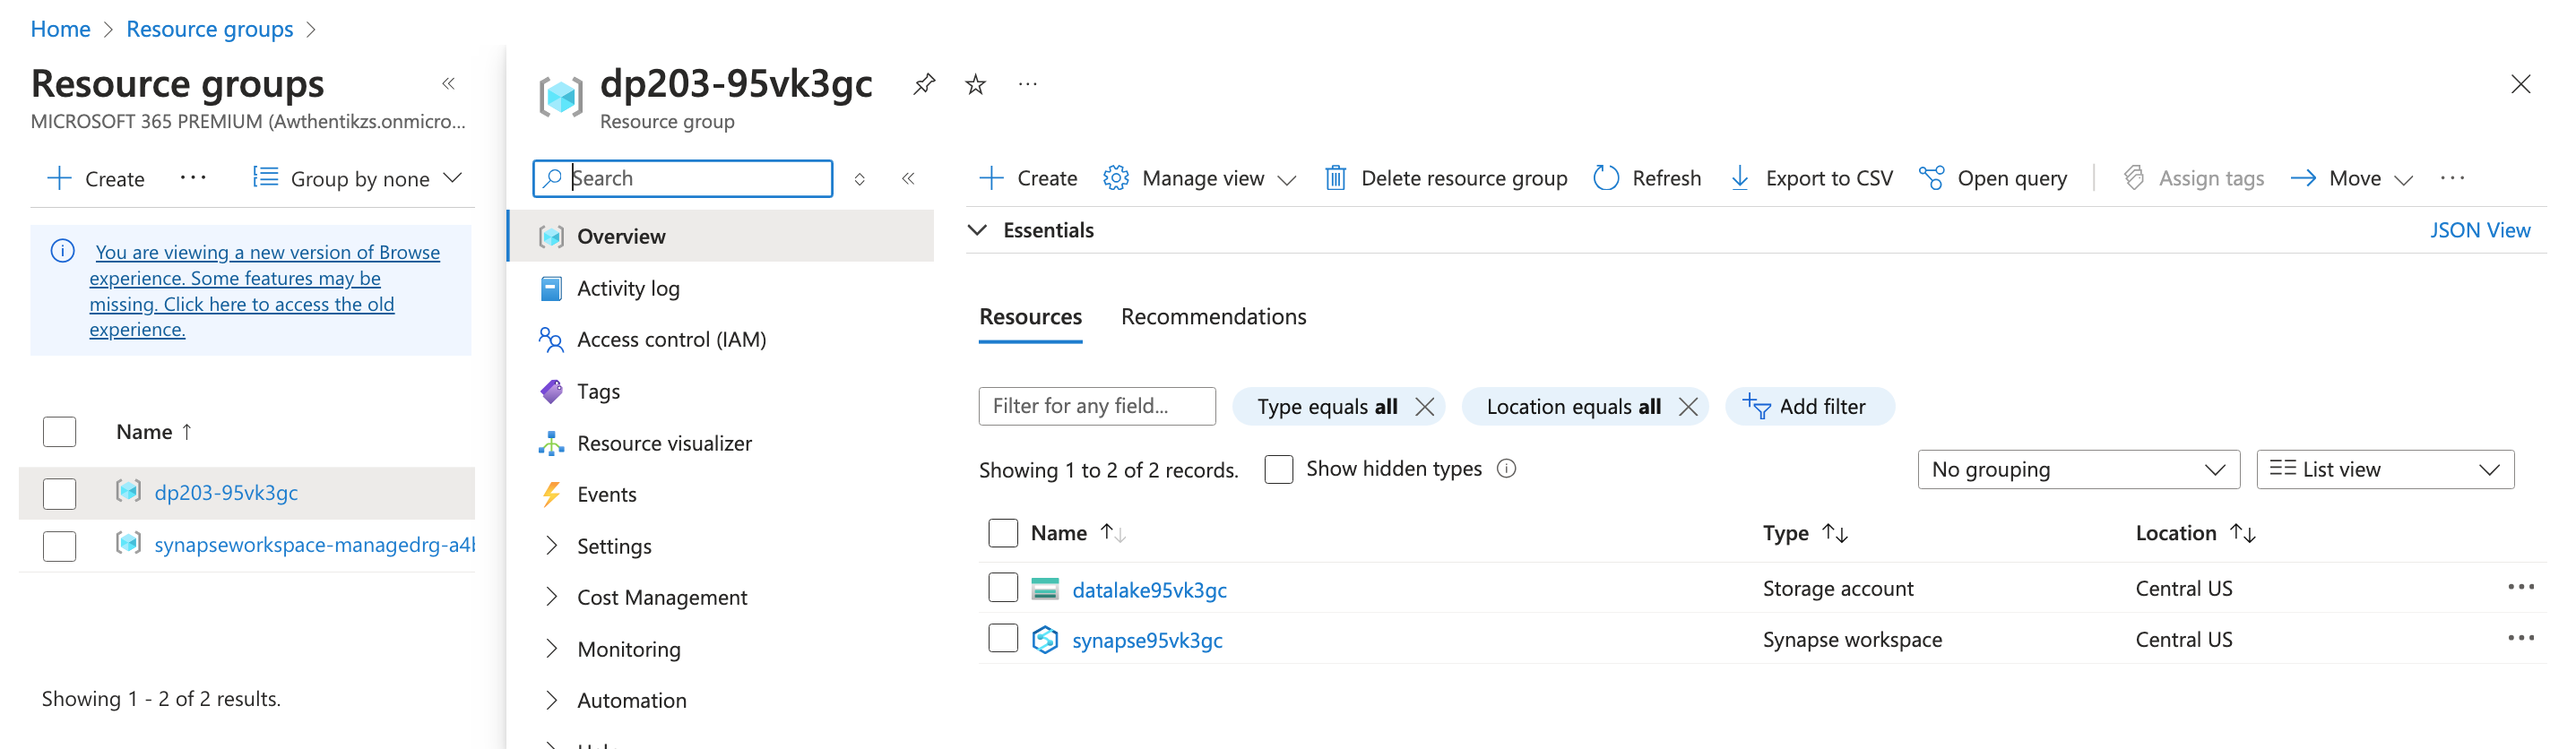

# Query data in files
The script provisions an Azure Synapse Analytics workspace and an Azure Storage account to host the data lake, then uploads some data files to the data lake.

View files in the data lake
1. After the script has completed, in the Azure portal, go to the dp203-xxxxxxx resource group that it created, and select your Synapse workspace.
2. In the Overview page for your Synapse workspace, in the Open Synapse Studio card, select Open to open Synapse Studio in a new browser tab; signing in if prompted.

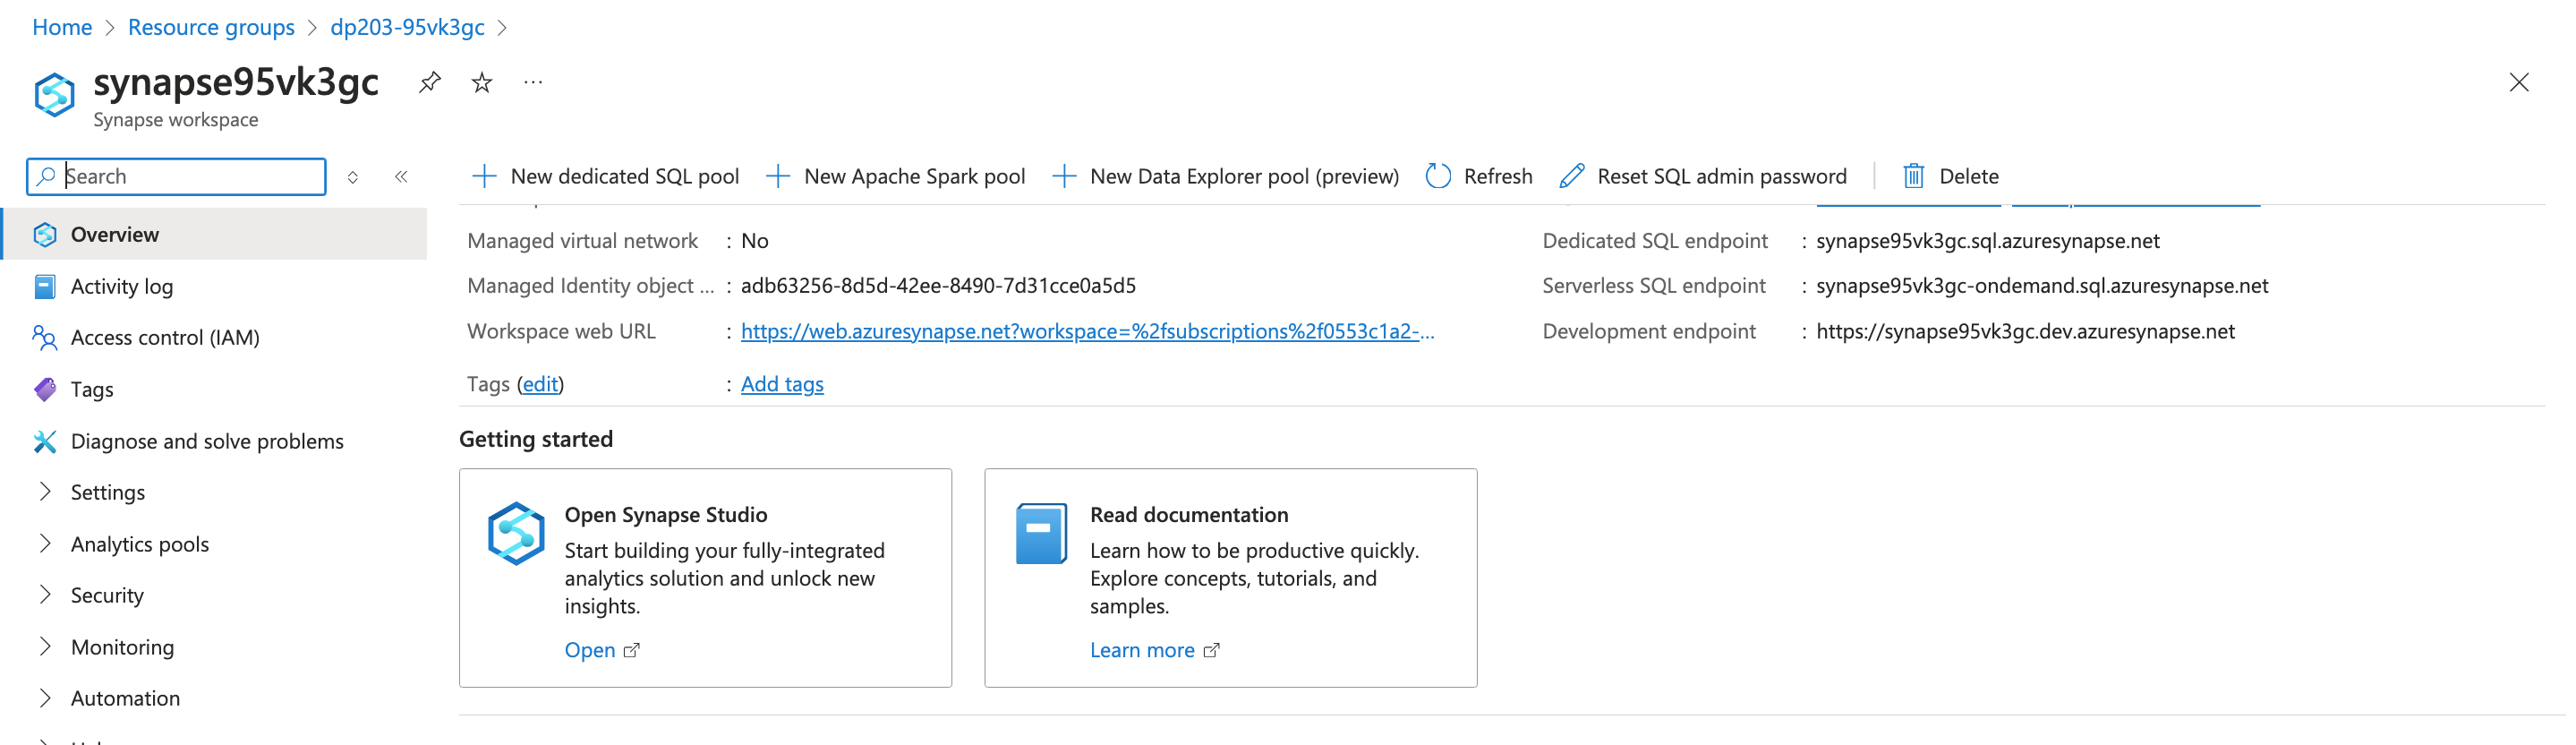

3. On the left side of Synapse Studio, use the ›› icon to expand the menu - this reveals the different pages within Synapse Studio that you’ll use to manage resources and perform data analytics tasks.
4. On the Data page, view the Linked tab and verify that your workspace includes a link to your Azure Data Lake Storage Gen2 storage account, which should have a name similar to synapsexxxxxxx (Primary - datalakexxxxxxx).

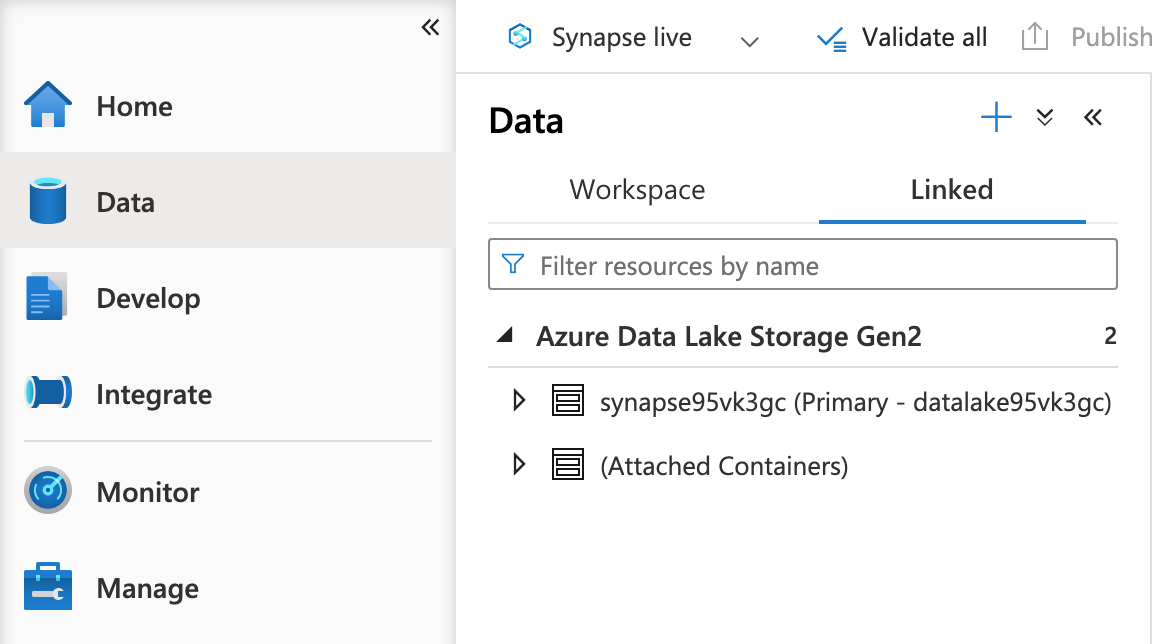

5. Expand your storage account and verify that it contains a file system container named files.

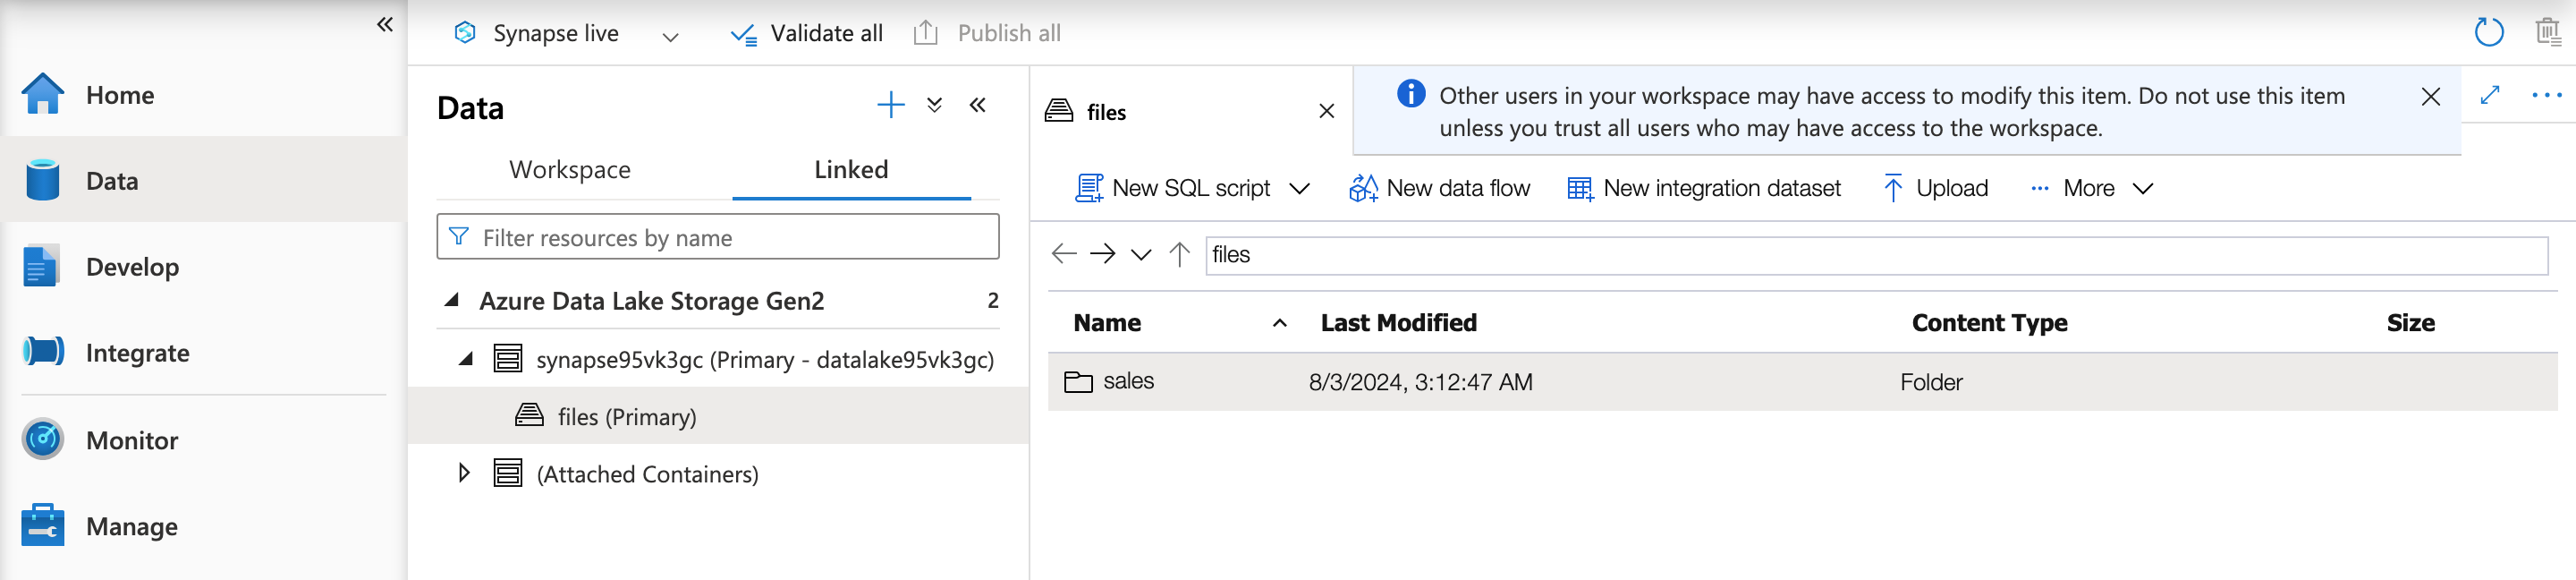

6. Select the files container, and note that it contains a folder named sales. This folder contains the data files you are going to query.
7. Open the sales folder and the csv folder it contains, and observe that this folder contains .csv files for three years of sales data.
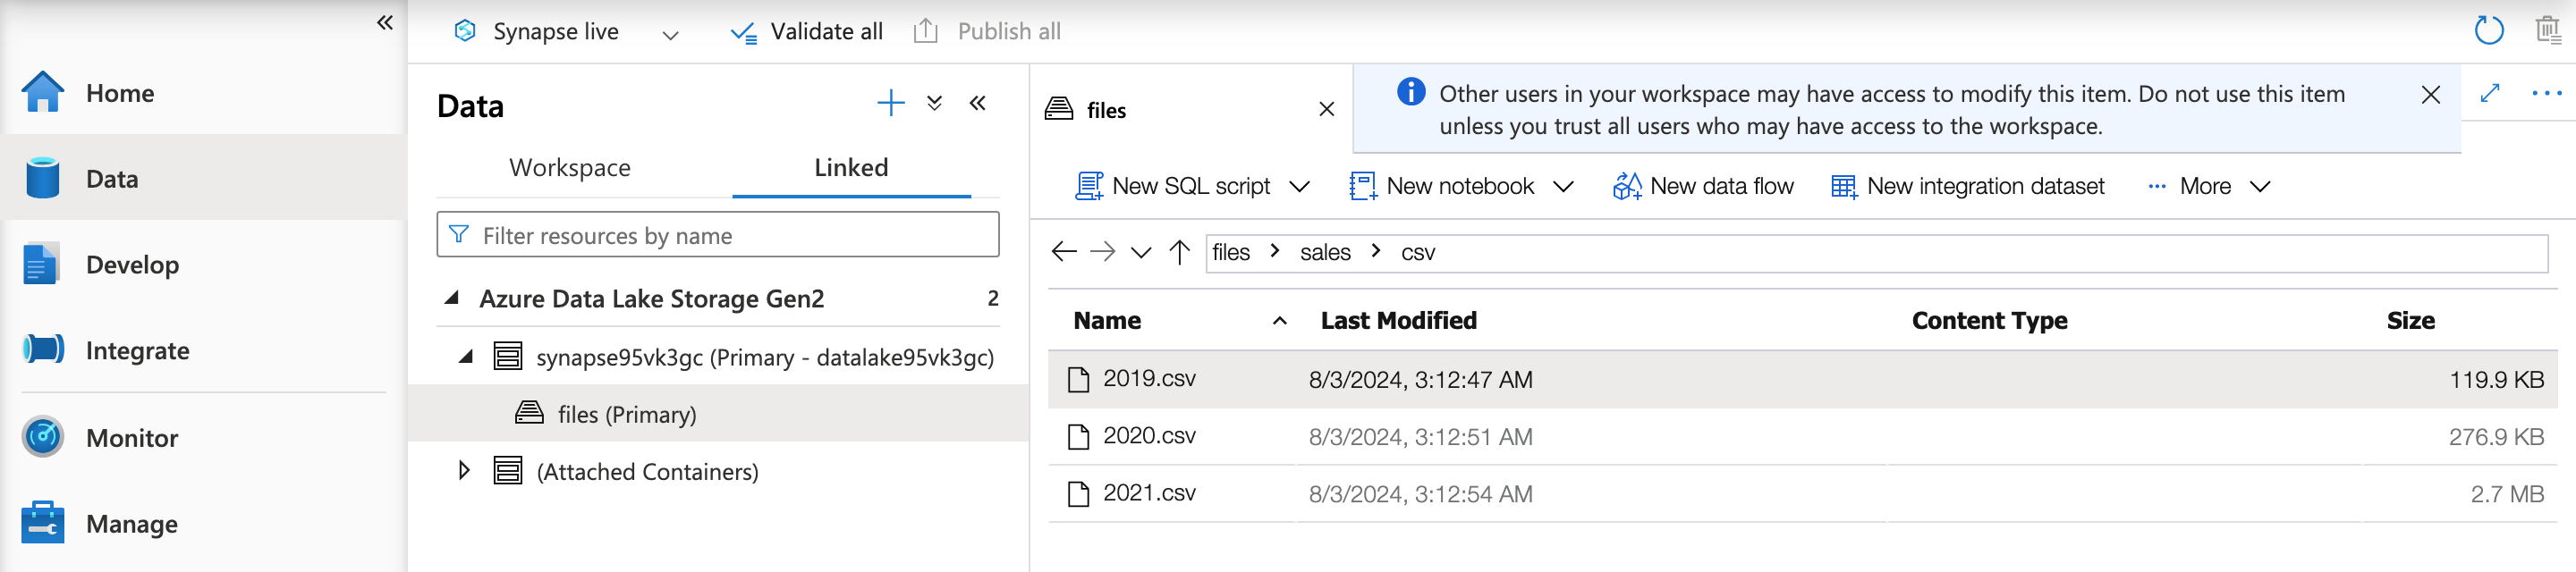
8. Right-click any of the files and select Preview to see the data it contains. Note that the files contain a header row.
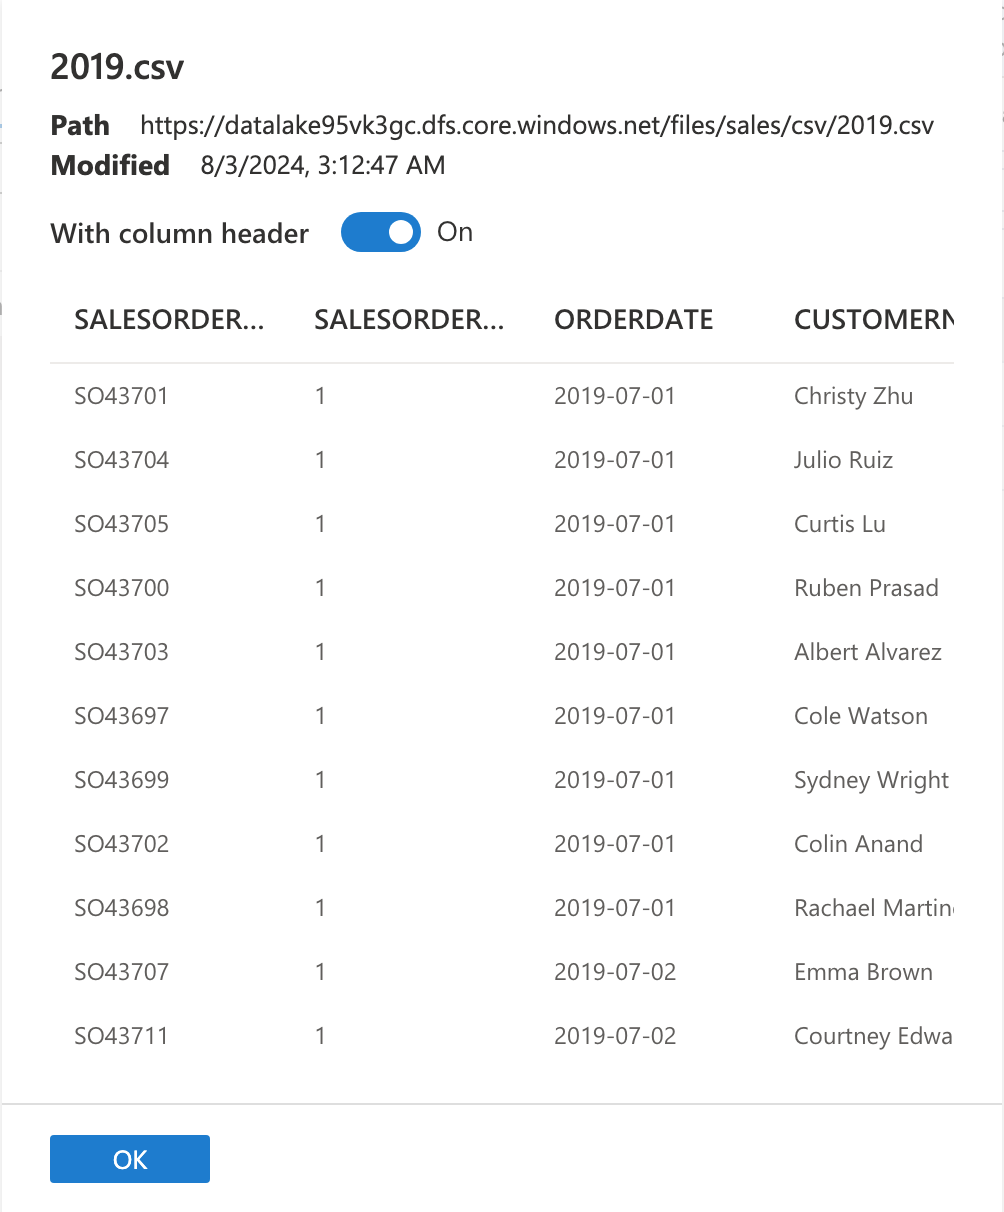
9. Close the preview, and then use the ↑ button to navigate back to the sales folder.

## Use SQL to query CSV files
1. Select the csv folder, and then in the New SQL script list on the toolbar, select Select TOP 100 rows.
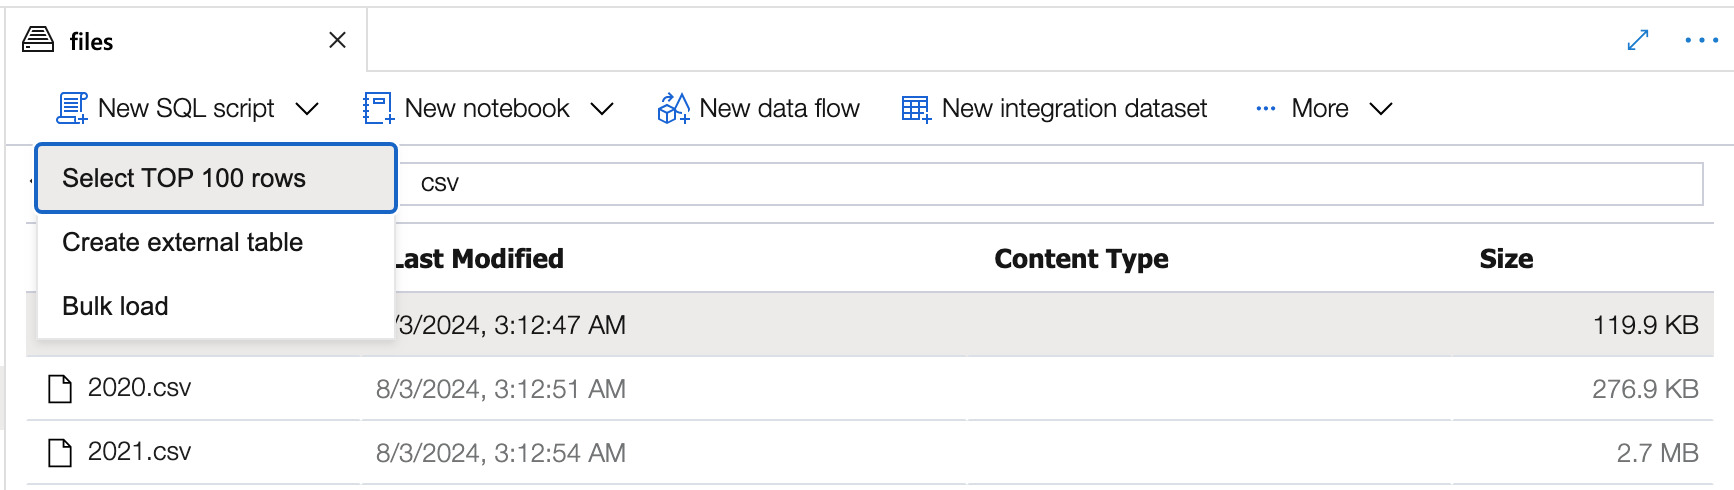

2. In the File type list, select Text format, and then apply the settings to open a new SQL script that queries the data in the folder.

3. In the Properties pane for SQL Script 1 that is created, change the name to Query Sales CSV files, and change the result settings to show All rows. 

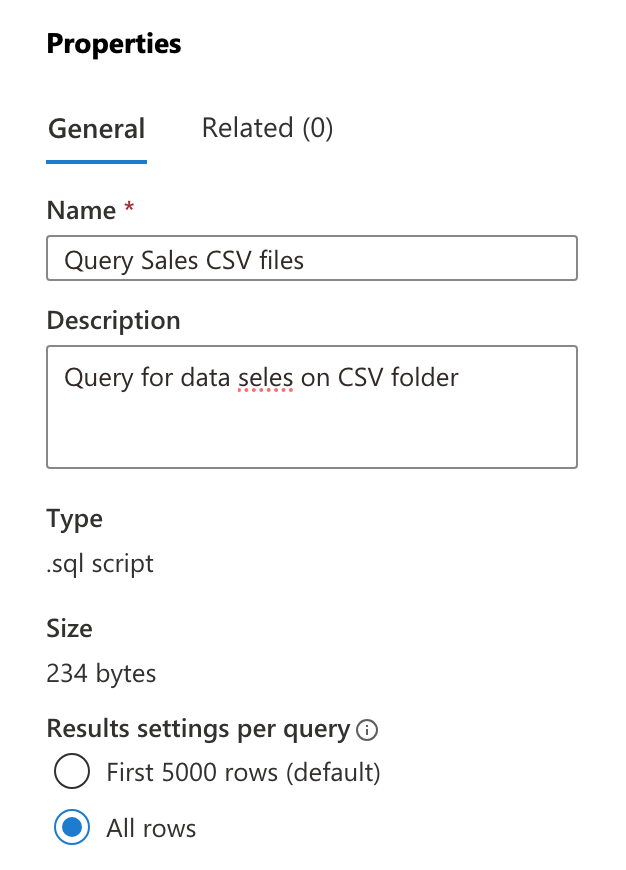

Then in the toolbar, select Publish to save the script and use the Properties button (which looks similar to 🗏*) on the right end of the toolbar to hide the Properties pane.

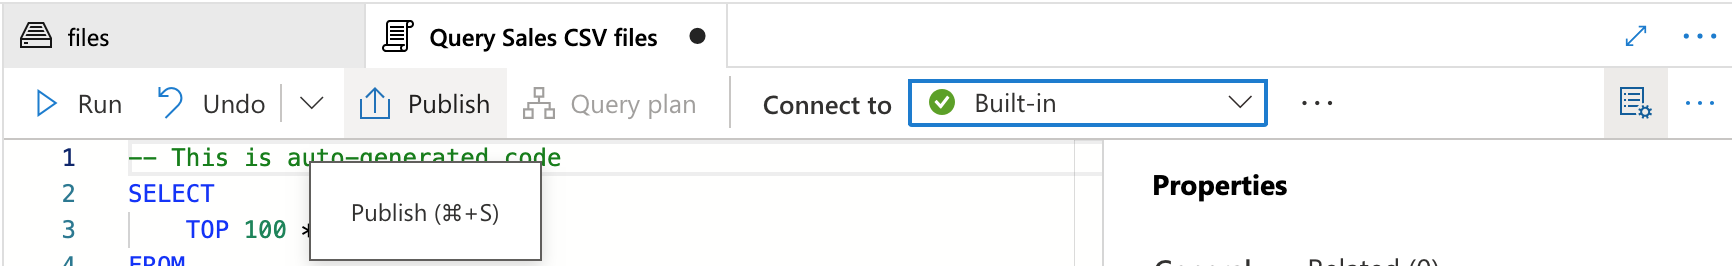

4. Review the SQL code that has been generated, which should be similar to this:
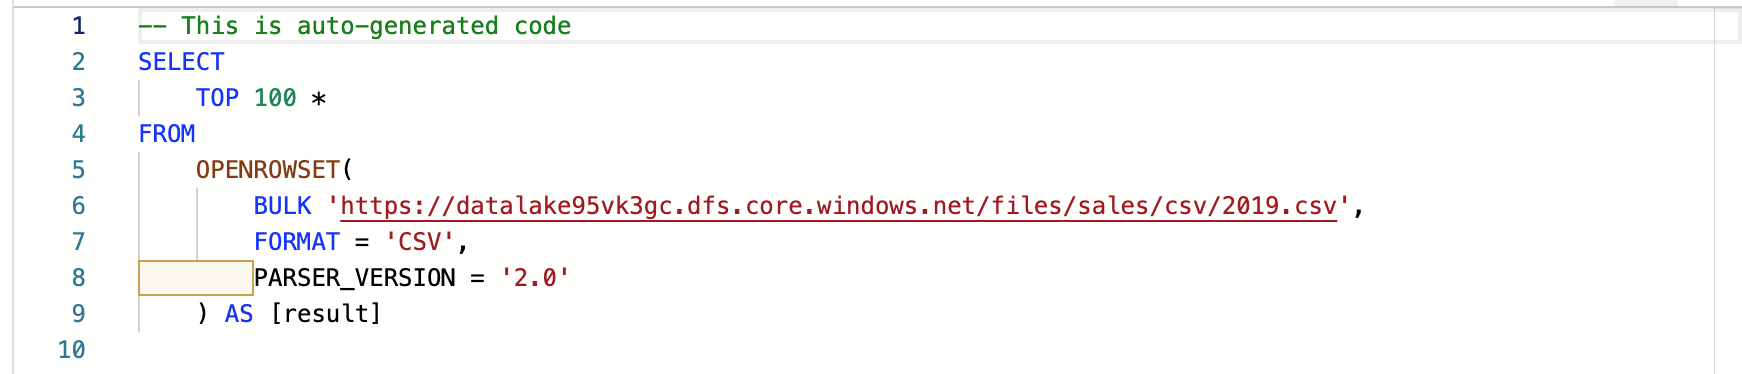
This code uses the OPENROWSET to read data from the CSV files in the sales folder and retrieves the first 100 rows of data.

5. In this case, the data files include the column names in the first row; so modify the query to add a HEADER_ROW = TRUE parameter to the OPENROWSET clause, as shown here (don’t forget to add a comma after the previous parameter):

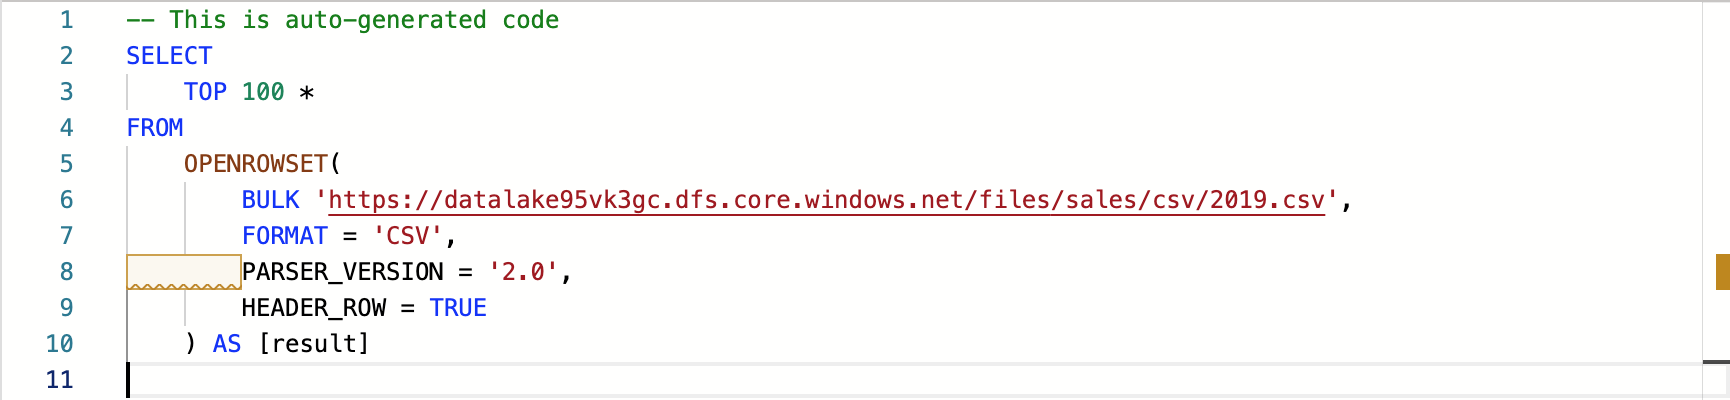

6. In the Connect to list, ensure Built-in is selected - this represents the built-in SQL Pool that was created with your workspace. Then on the toolbar, use the ▷ Run button to run the SQL code, and review the results, which should look similar to this:
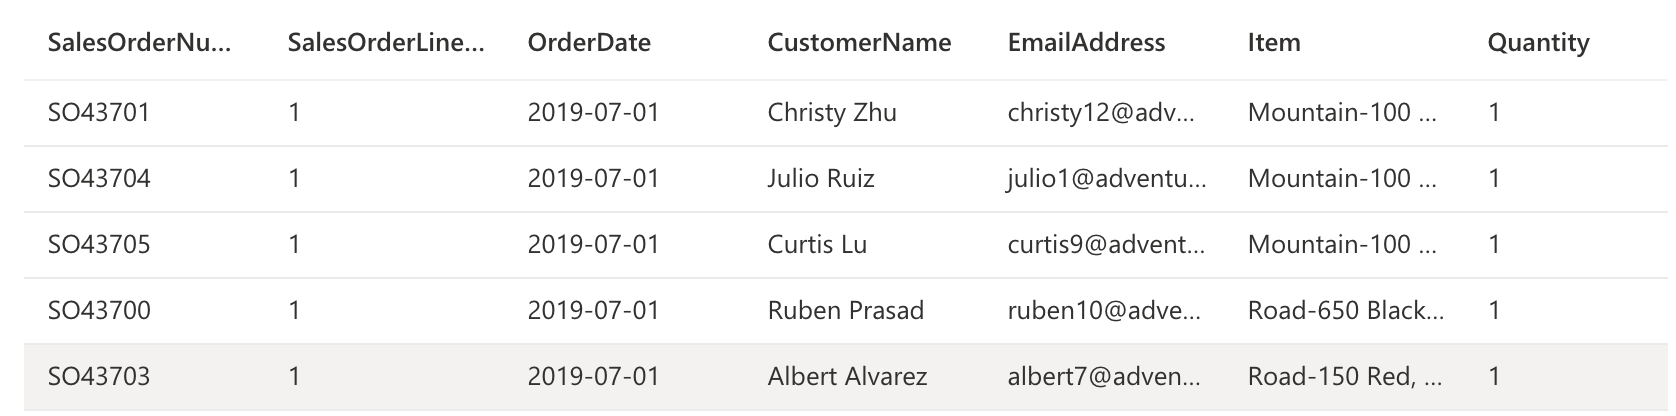
7. Publish the changes to your script, and then close the script pane.


# Transform data using CREATE EXTERNAL TABLE AS SELECT (CETAS) statements
A simple way to use SQL to transform data in a file and persist the results in another file is to use a CREATE EXTERNAL TABLE AS SELECT (CETAS) statement. This statement creates a table based on the requests of a query, but the data for the table is stored as files in a data lake. The transformed data can then be queried through the external table, or accessed directly in the file system (for example, for inclusion in a downstream process to load the transformed data into a data warehouse).

### Create an external data source and file format
By defining an external data source in a database, you can use it to reference the data lake location where you want to store files for external tables. An external file format enables you to define the format for those files - for example, Parquet or CSV. To use these objects to work with external tables, you need to create them in a database other than the default master database.

1. In Synapse Studio, on the Develop page, in the + menu, select SQL script.
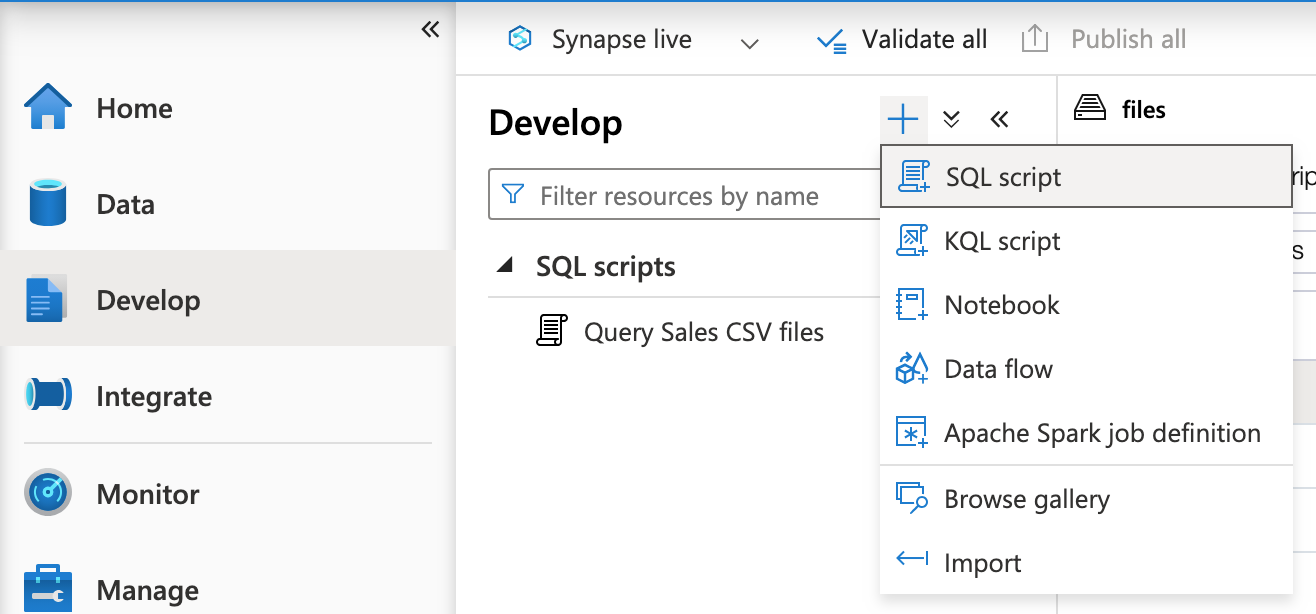
2. In the new script pane, add the following code (replacing datalakexxxxxxx with the name of your data lake storage account) to create a new database and add an external data source to it.
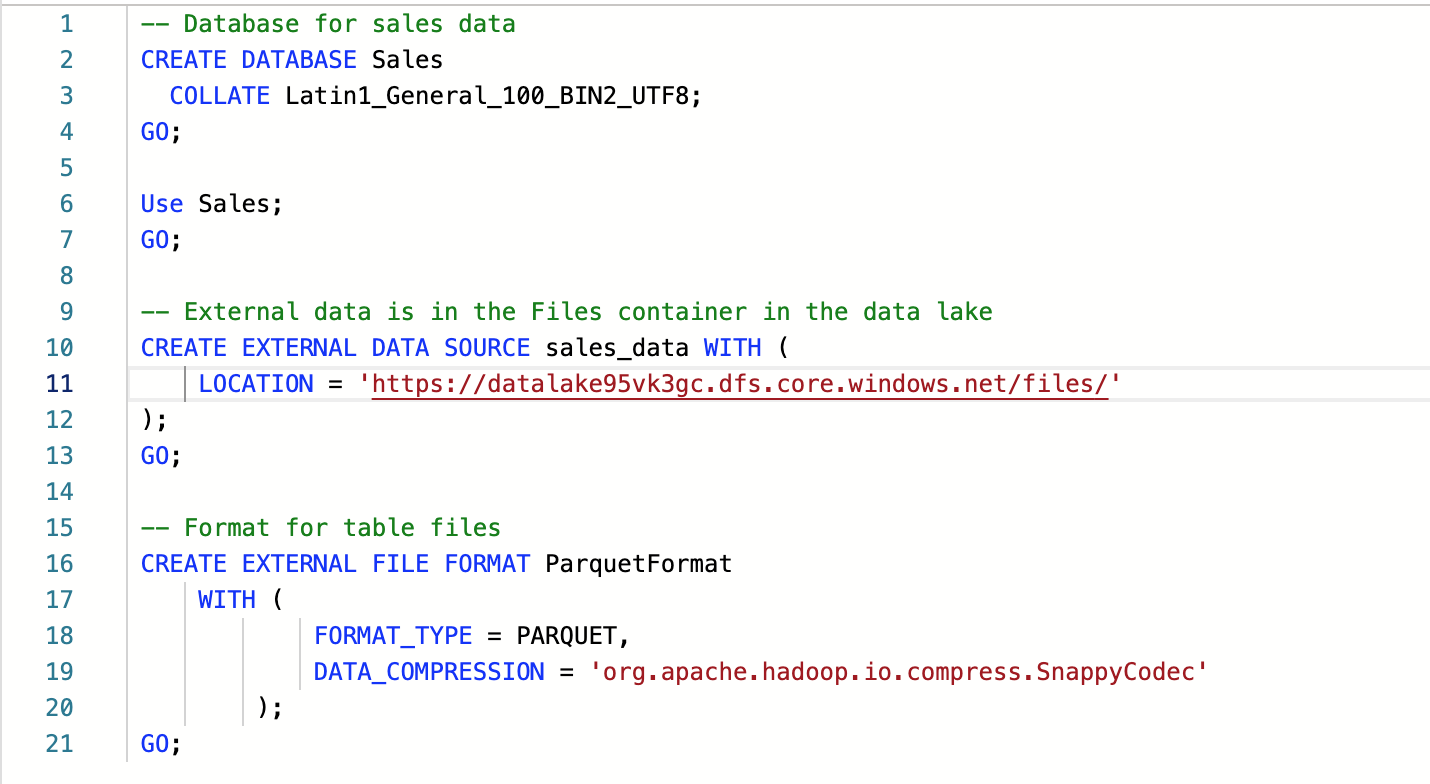
3. Modify the script properties to change its name to Create Sales DB, and publish it.
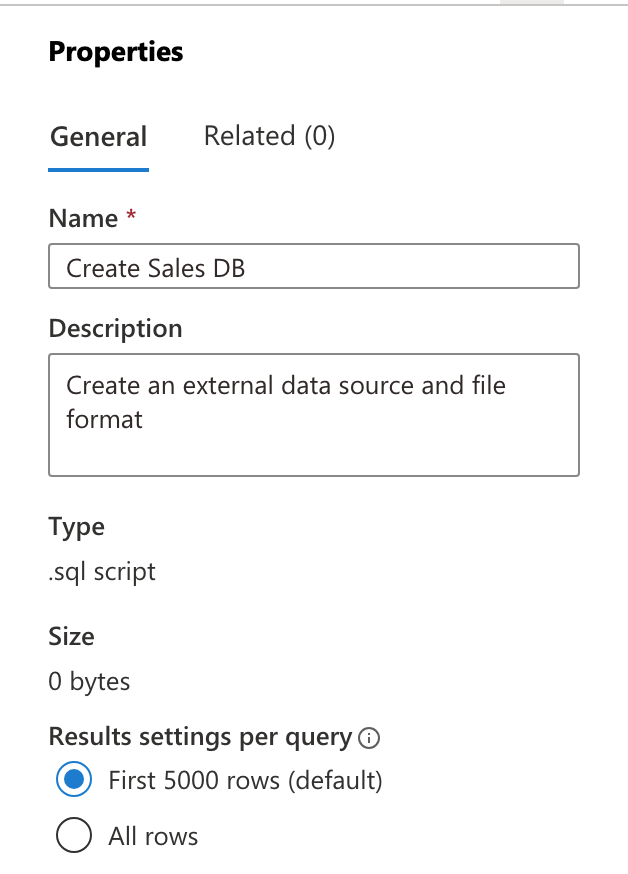
4. Ensure that the script is connected to the Built-in SQL pool and the master database, and then run it.
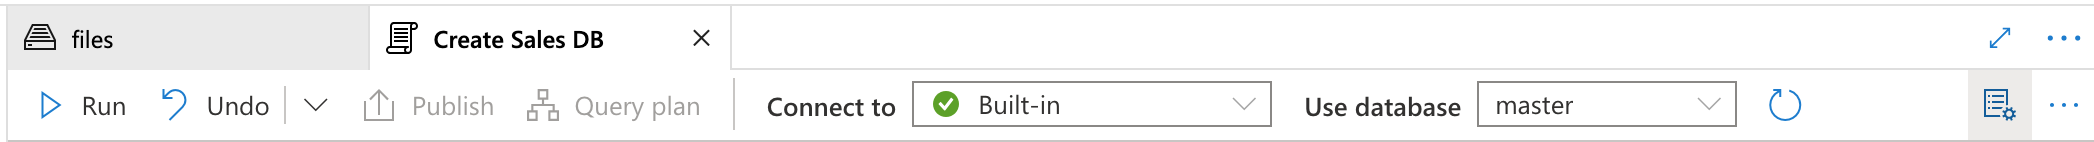
5. Switch back to the Data page and use the ↻ button at the top right of Synapse Studio to refresh the page. Then view the Workspace tab in the Data pane, where a SQL database list is now displayed. Expand this list to verify that the Sales database has been created.
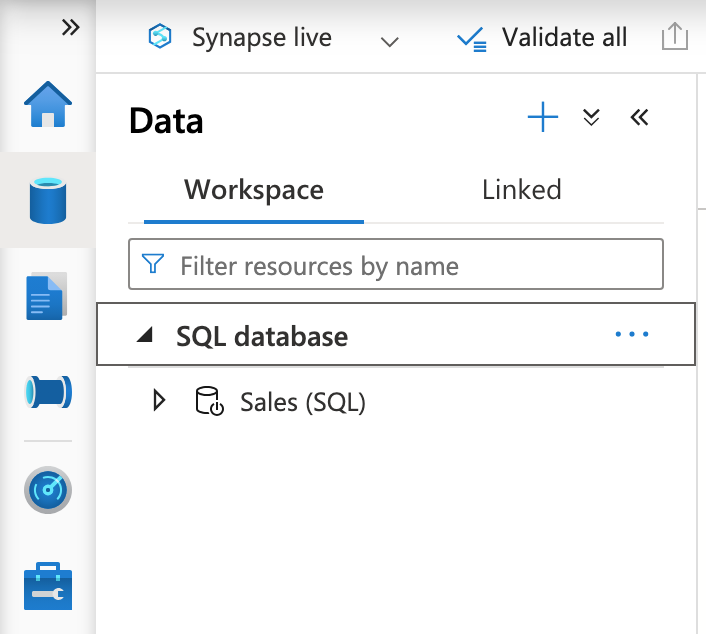
6. Expand the Sales database, its External Resources folder, and the External data sources folder under that to see the sales_data external data source you created.
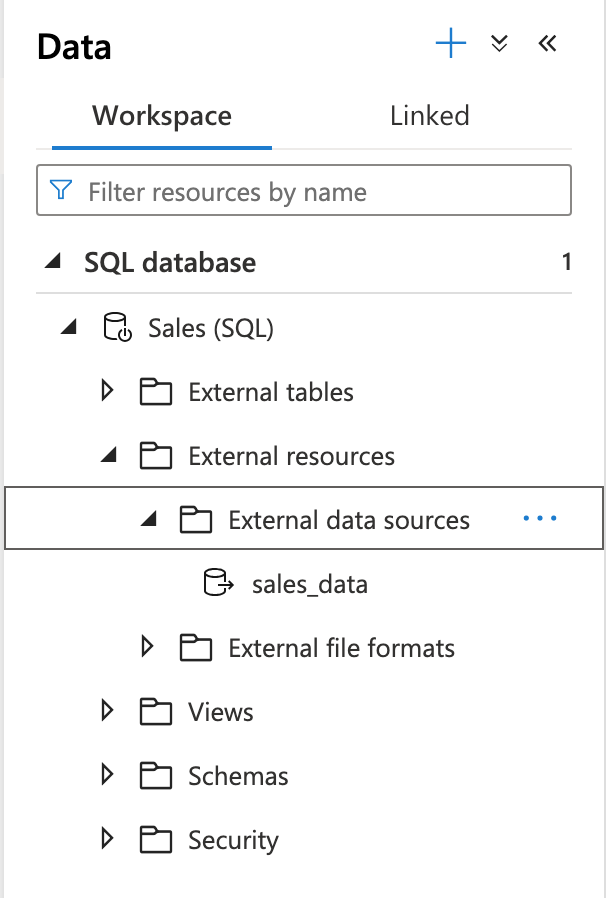

### Create an External table
1. In Synapse Studio, on the Develop page, in the + menu, select SQL script.
2. In the new script pane, add the following code to retrieve and aggregate data from the CSV sales files by using the external data source - noting that the BULK path is relative to the folder location on which the data source is defined:
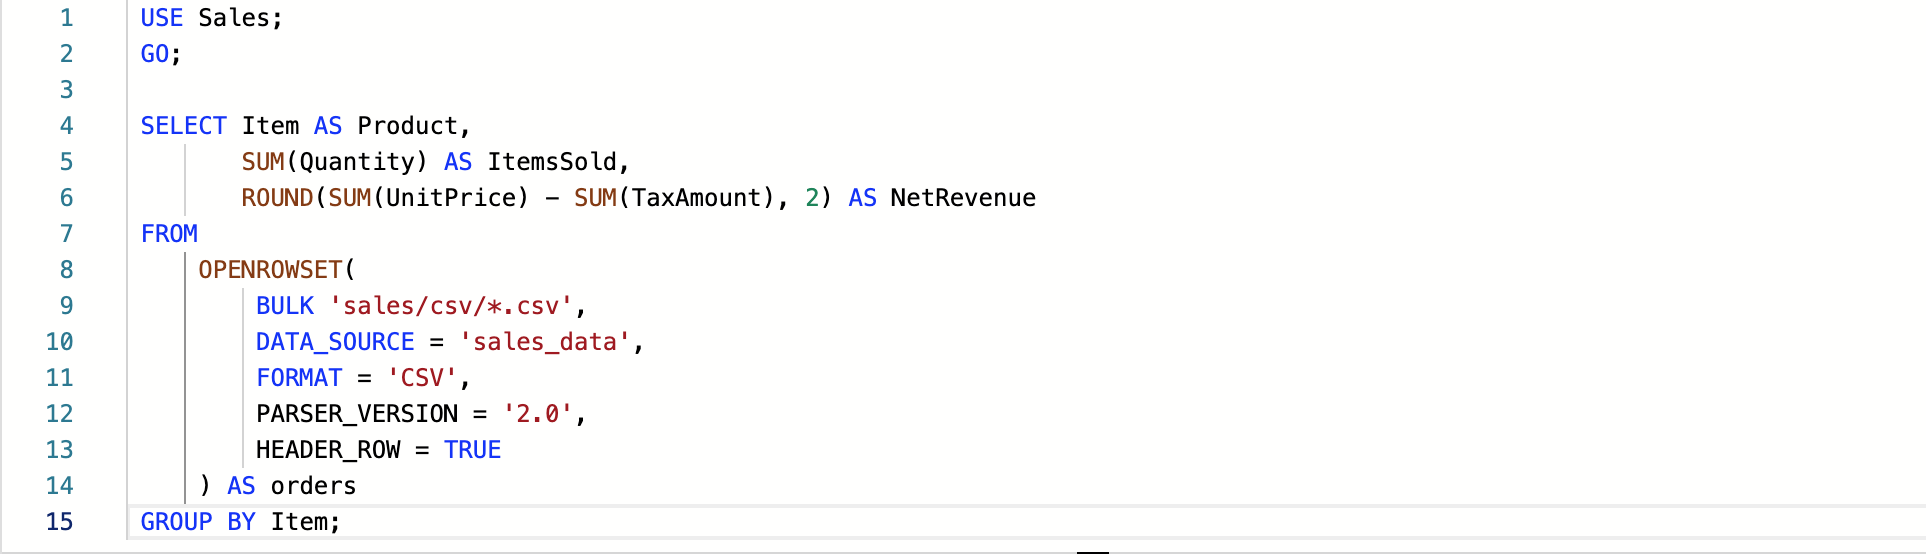
3. Run the script. The results should look similar to this:
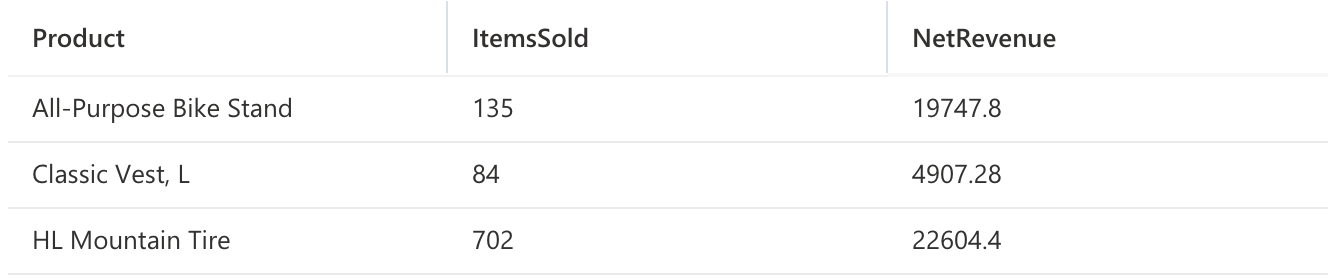
4. Modify the SQL code to save the results of query in an external table, like this:
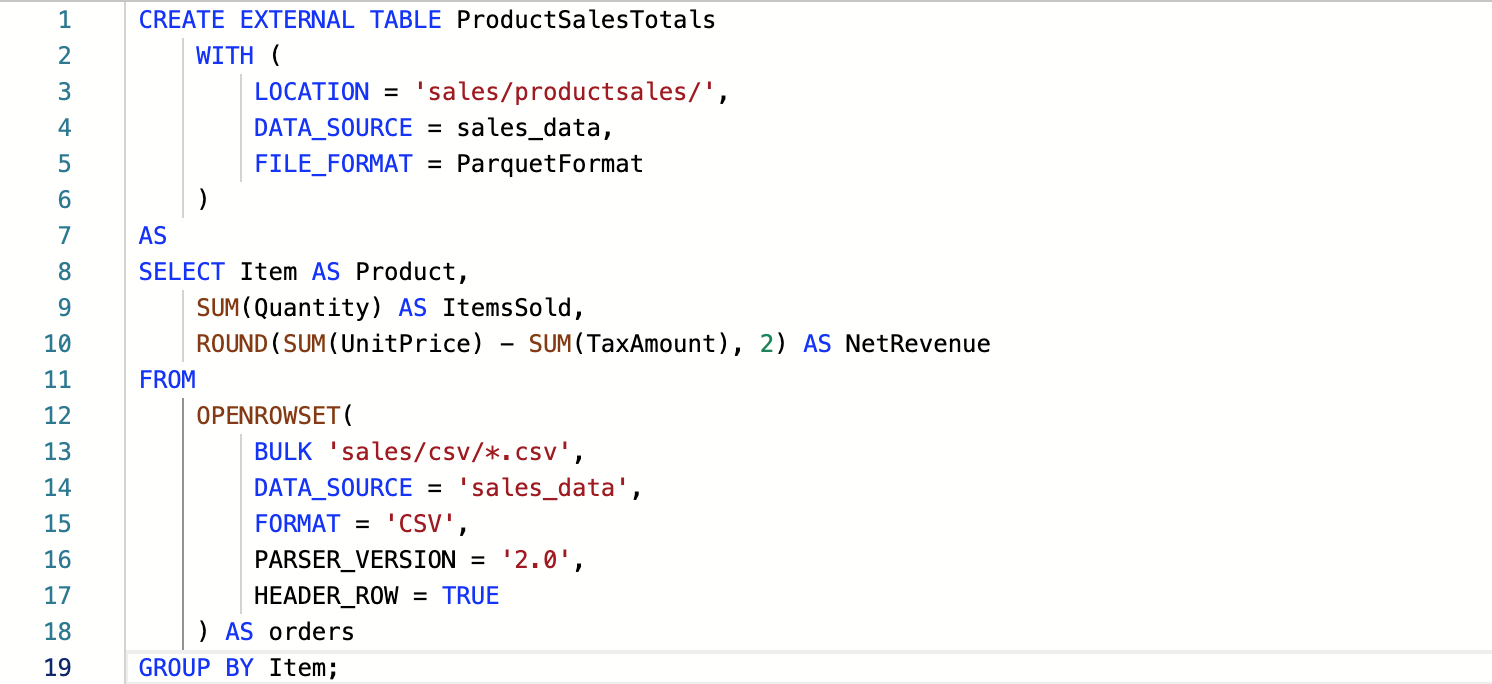
5. Run the script. This time there’s no output, but the code should have created an external table based on the results of the query.
6. Name the script Create ProductSalesTotals table and publish it.
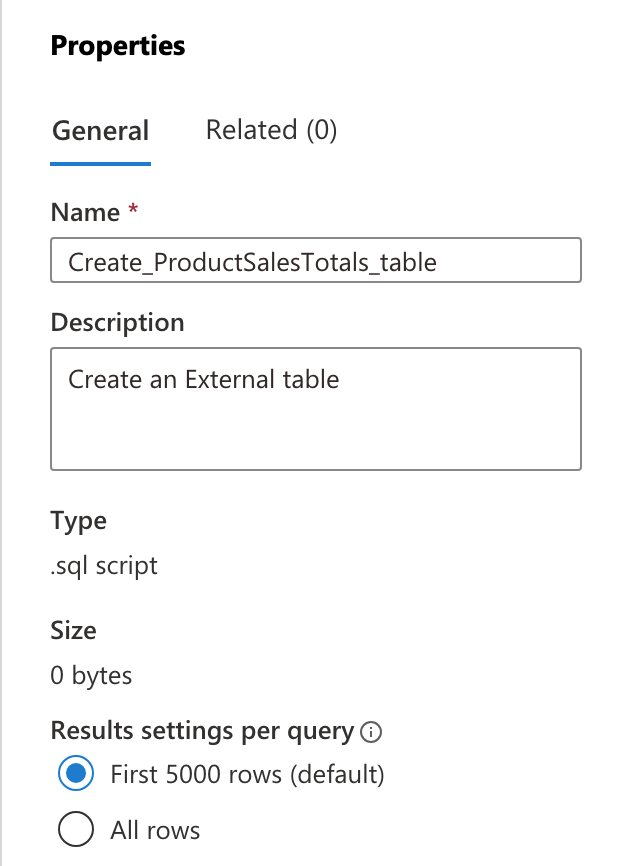
7. On the data page, in the Workspace tab, view the contents of the External tables folder for the Sales SQL database to verify that a new table named ProductSalesTotals has been created.

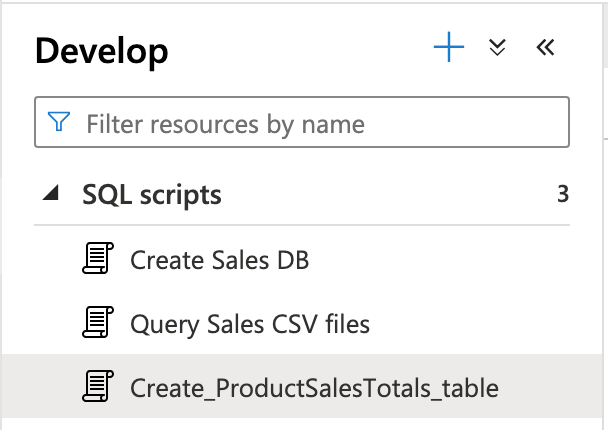

8. In the … menu for the ProductSalesTotals table, select New SQL script > Select TOP 100 rows. Then run the resulting script and verify that it returns the aggregated product sales data.
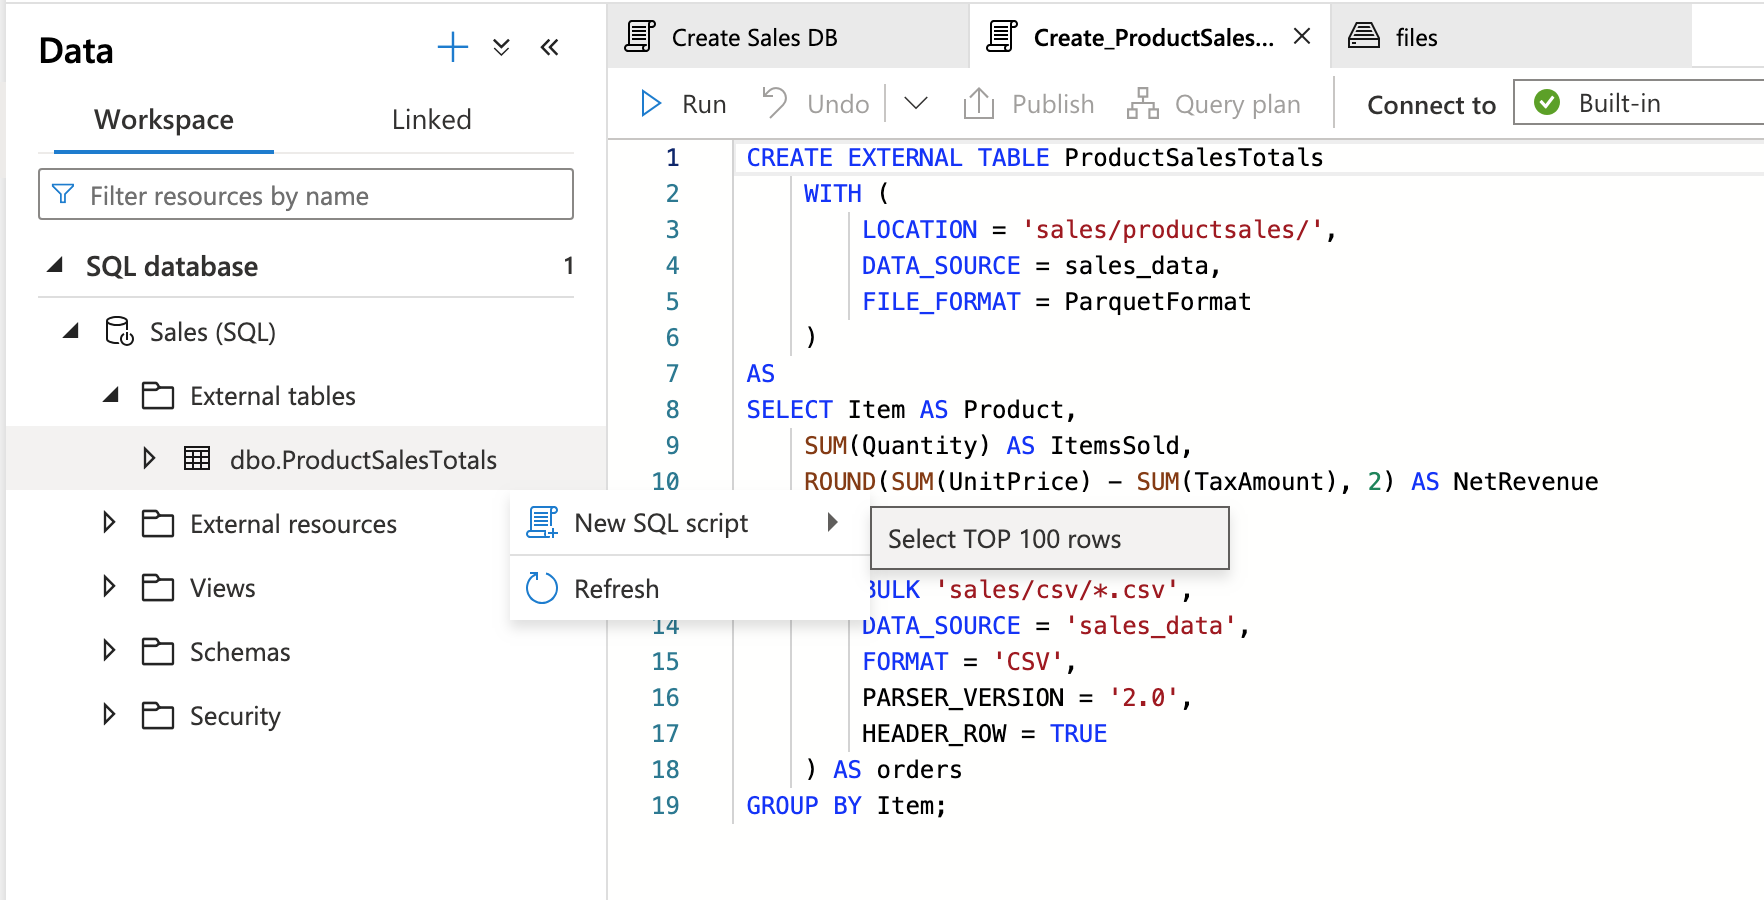

9. On the files tab containing the file system for your data lake, view the contents of the sales folder (refreshing the view if necessary) and verify that a new productsales folder has been created.
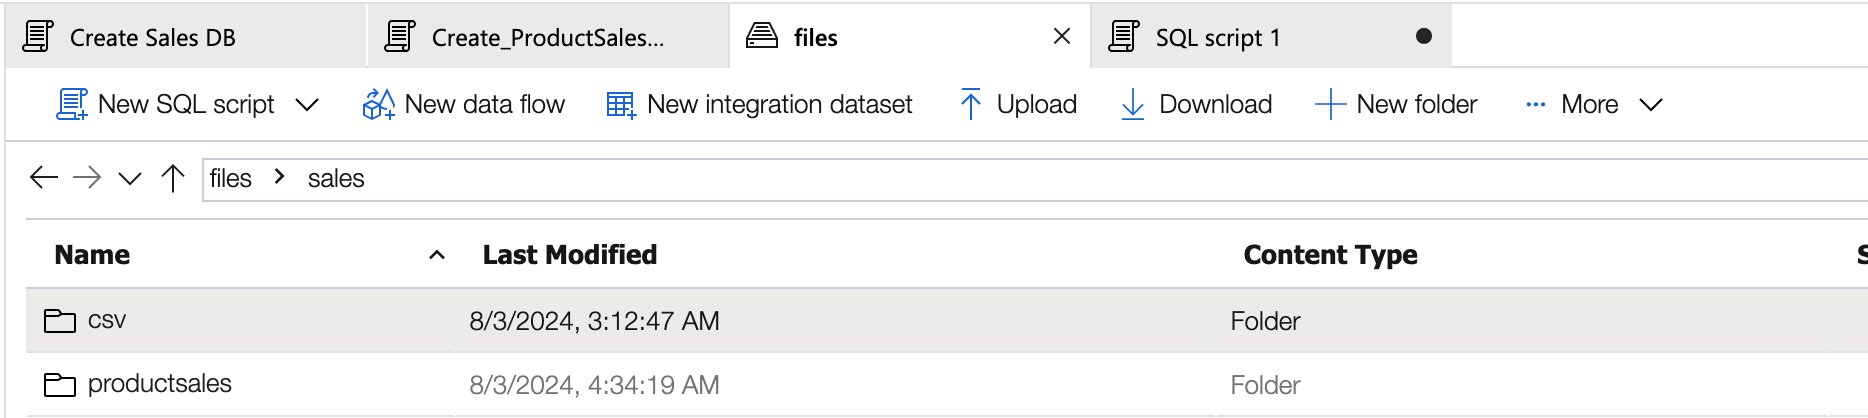
10. In the productsales folder, observe that one or more files with names similar to ABC123DE—-.parquet have been created. These files contain the aggregated product sales data. To prove this, you can select one of the files and use the New SQL script > Select TOP 100 rows menu to query it directly.
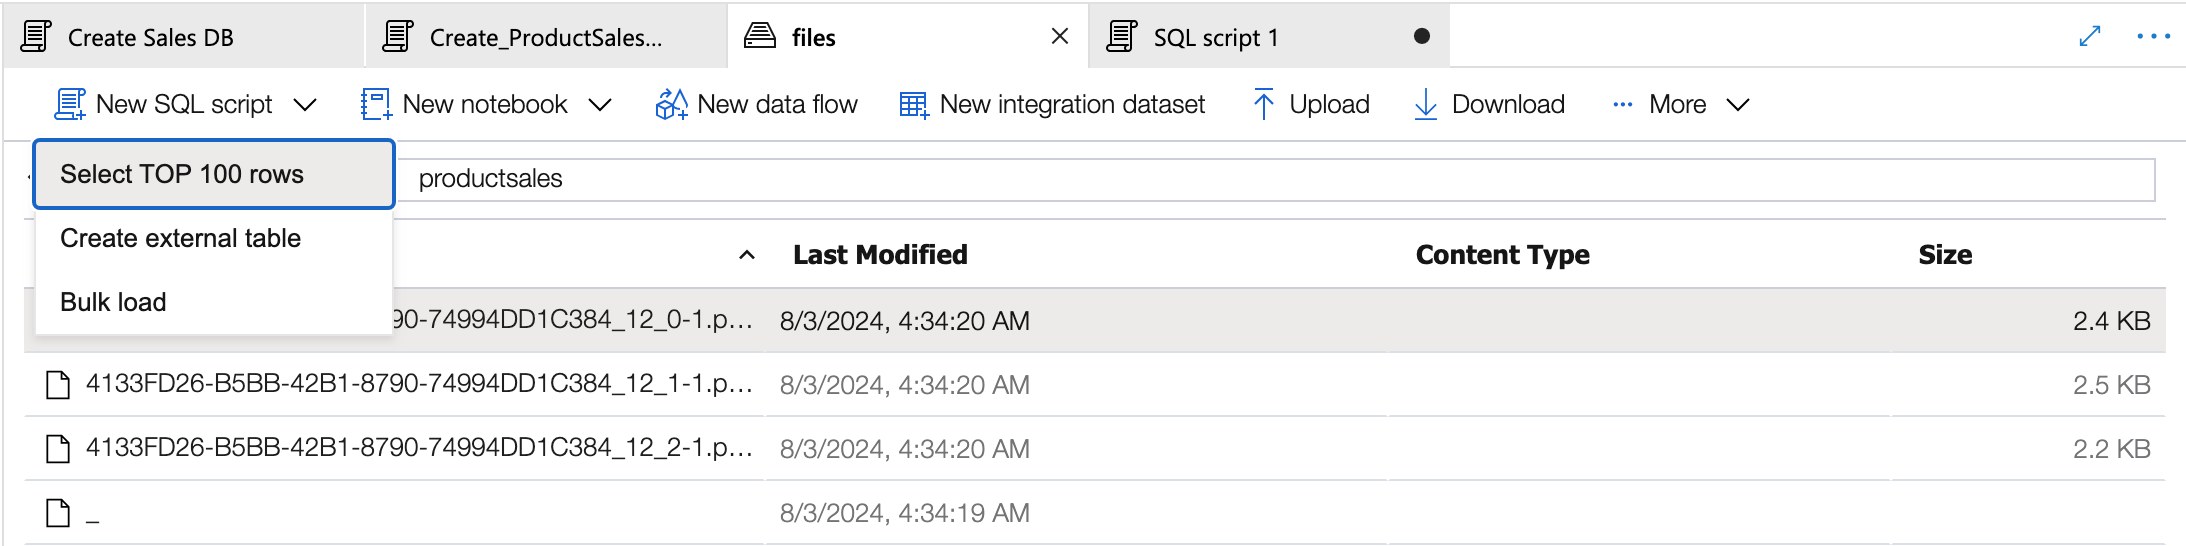

# Encapsulate data transformation in a stored procedure
If you will need to transform data frequently, you can use a stored procedure to encapsulate a CETAS statement.

1. In Synapse Studio, on the Develop page, in the + menu, select SQL script.
2. In the new script pane, add the following code to create a stored procedure in the Sales database that aggregates sales by year and saves the results in an external table:
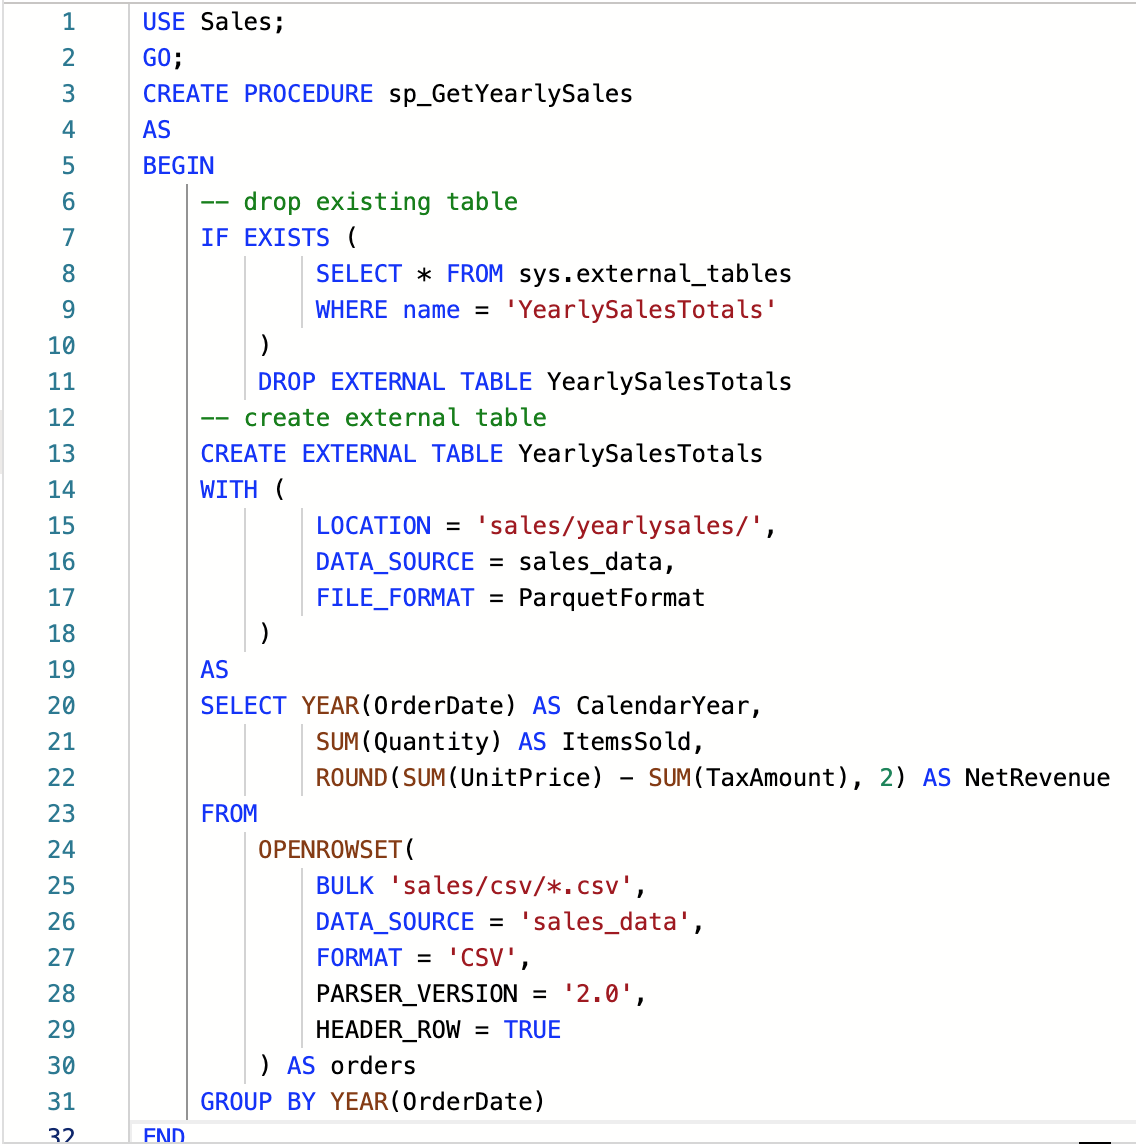
3. Run the script to create the stored procedure.
4. Under the code you just ran, add the following code to call the stored procedure:
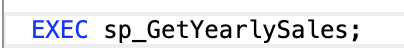
5. Select only the EXEC sp_GetYearlySales; statement you just added, and use the ▷ Run button to run it.
6. On the files tab containing the file system for your data lake, view the contents of the sales folder (refreshing the view if necessary) and verify that a new yearlysales folder has been created.
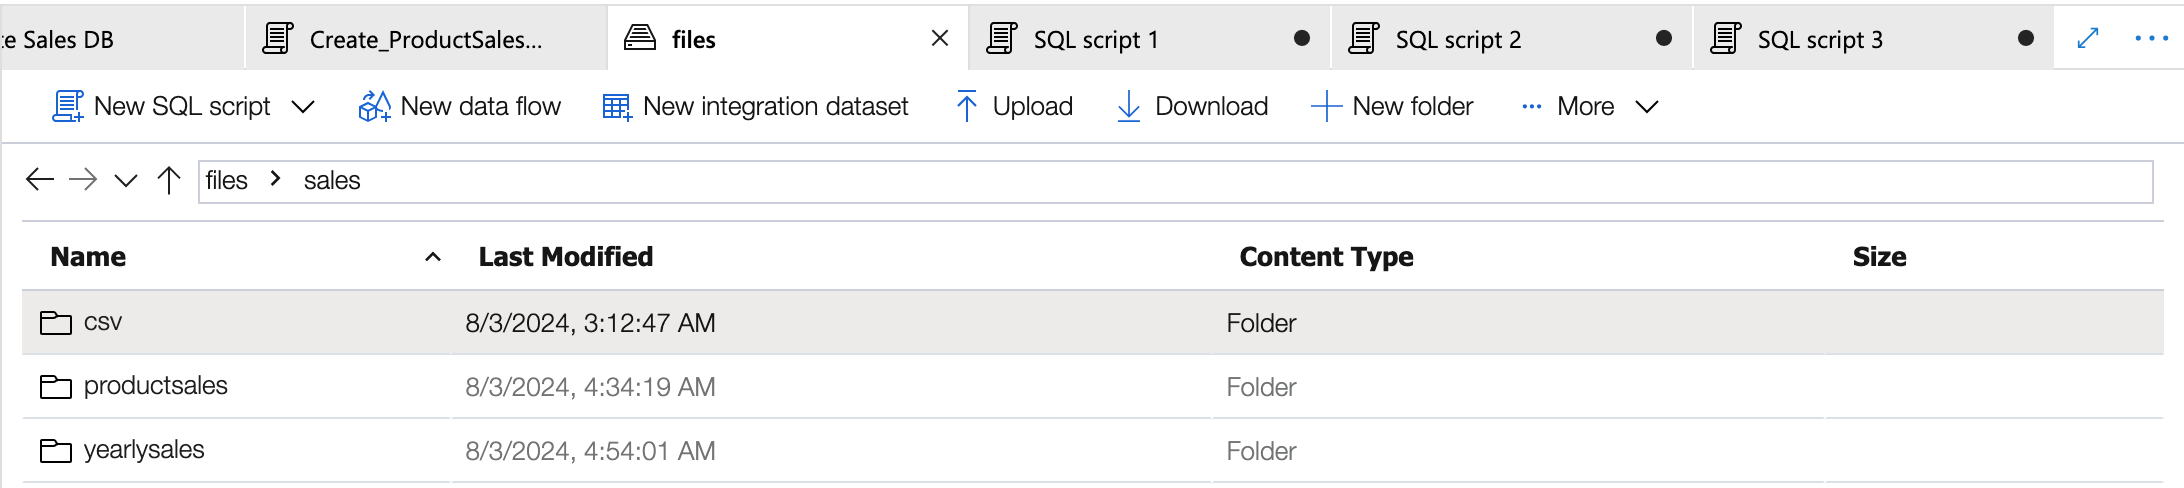
7. In the yearlysales folder, observe that a parquet file containing the aggregated yearly sales data has been created.

8. Switch back to the SQL script and re-run the EXEC sp_GetYearlySales; statement, and observe that an error occurs.
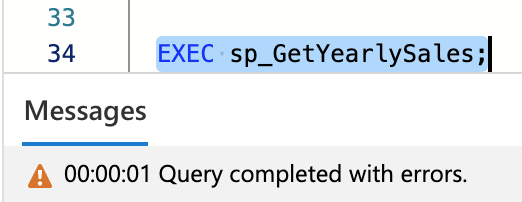
Even though the script drops the external table, the folder containing the data is not deleted. To re-run the stored procedure (for example, as part of a scheduled data transformation pipeline), you must delete the old data.
9. Switch back to the files tab, and view the sales folder. Then select the yearlysales folder and delete it.
10. Switch back to the SQL script and re-run the EXEC sp_GetYearlySales; statement. This time, the operation succeeds and a new data file is generated.


# Delete Azure resources
If you’ve finished exploring Azure Synapse Analytics, you should delete the resources you’ve created to avoid unnecessary Azure costs.

1. Close the Synapse Studio browser tab and return to the Azure portal.
2. On the Azure portal, on the Home page, select Resource groups.
3. Select the dp203-xxxxxxx resource group for your Synapse Analytics workspace (not the managed resource group), and verify that it contains the Synapse workspace and storage account for your workspace.
4. At the top of the Overview page for your resource group, select Delete resource group.
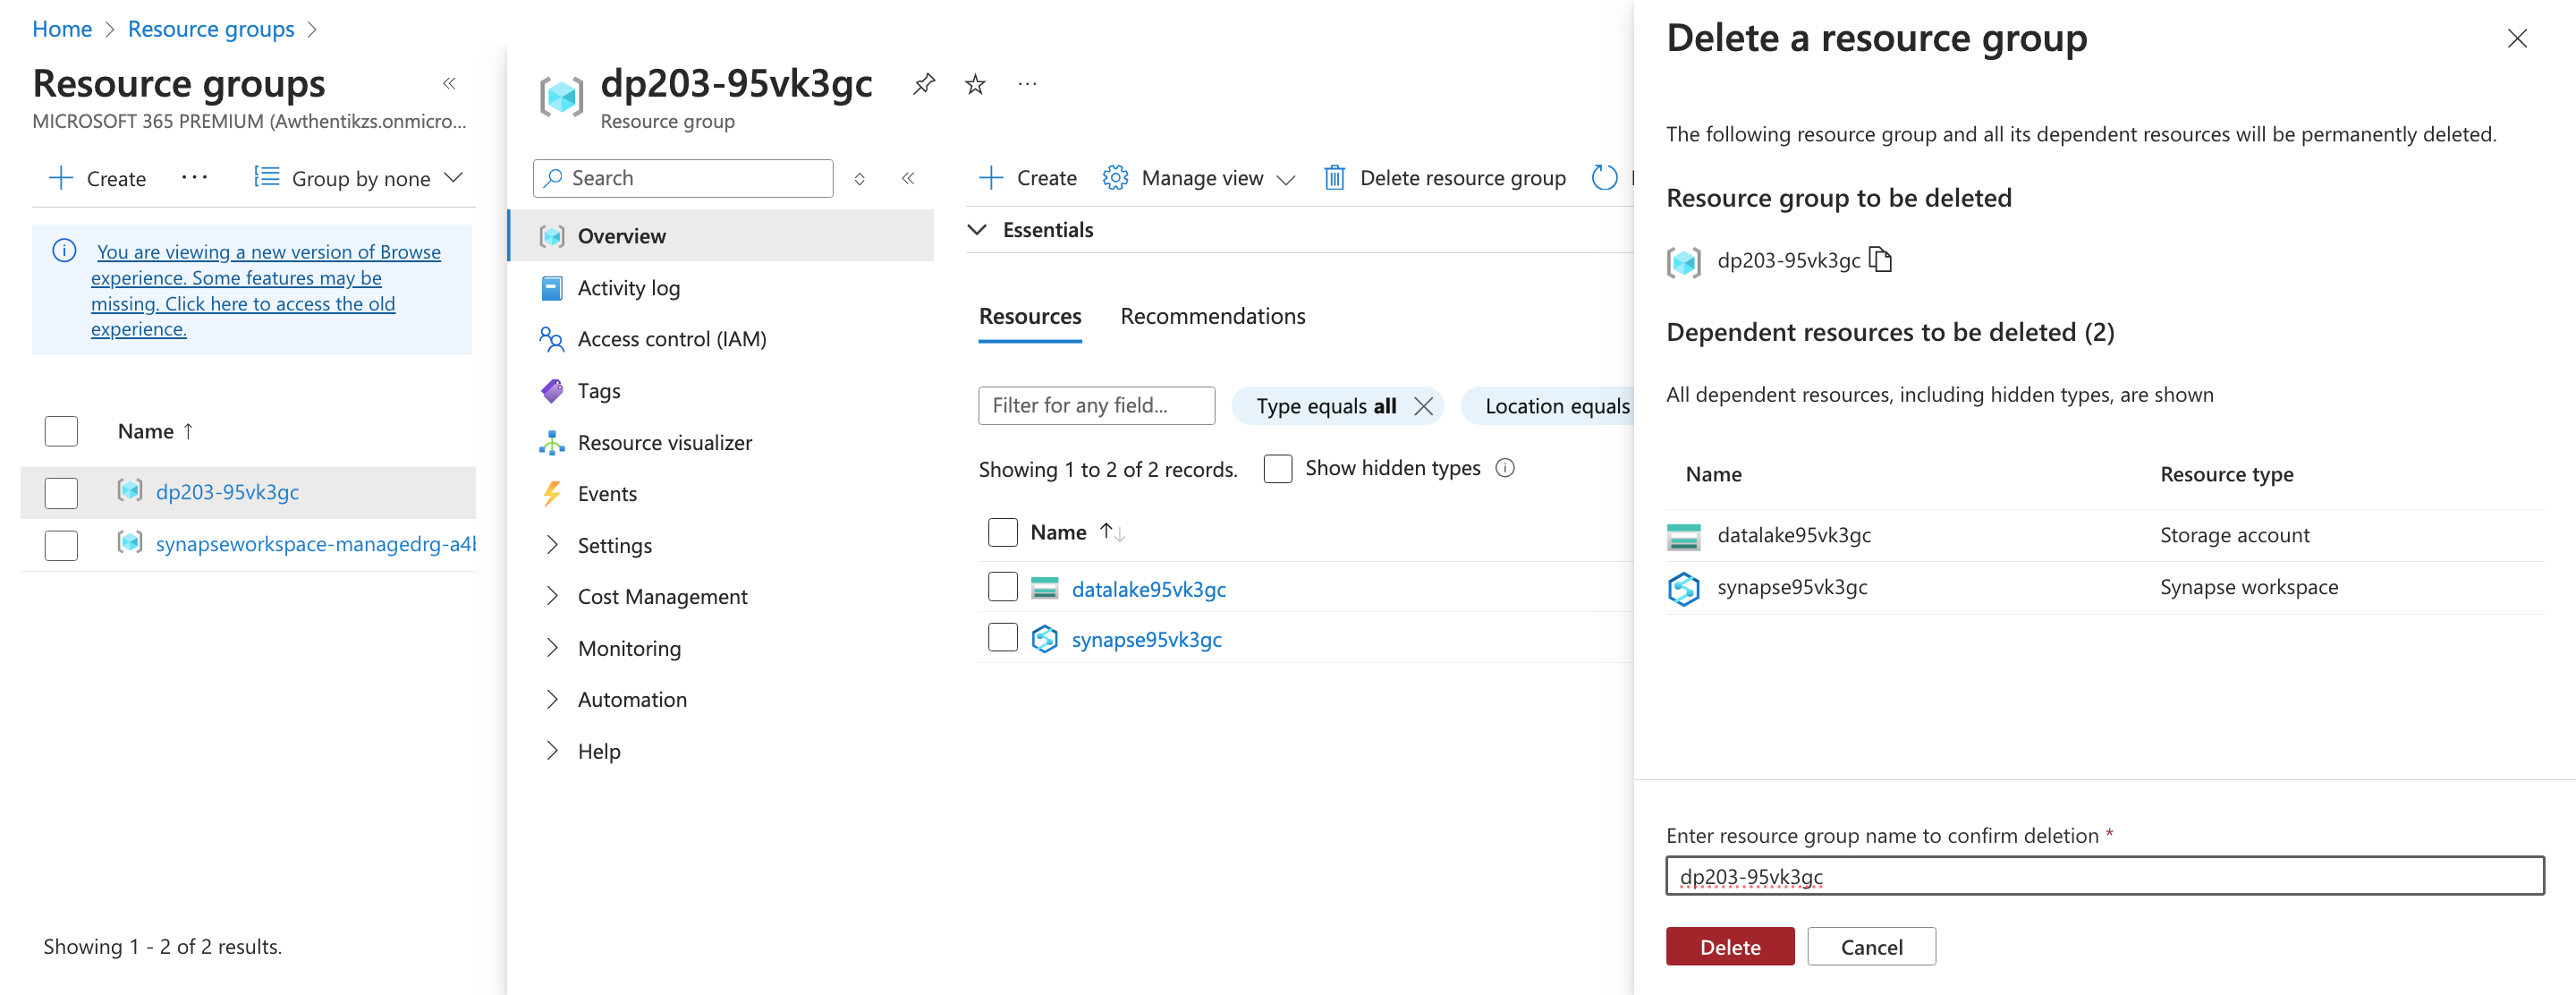
5. Enter the dp203-xxxxxxx resource group name to confirm you want to delete it, and select Delete.

After a few minutes, your Azure Synapse workspace resource group and the managed workspace resource group associated with it will be deleted.

# Summary

Serverless SQL pools enable you to easily query files in data lake. You can query various file formats CSV, JSON, Parquet, and create external database objects to provide a relational abstraction layer over the raw files.

In this module, you've learned how to:

1. Identify capabilities and use cases for serverless SQL pools in Azure Synapse Analytics
2. Query CSV, JSON, and Parquet files using a serverless SQL pool
3. Create external database objects in a serverless SQL pool